In [13]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import EfficientNetB2
# from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import os
import random
import numpy as np
import matplotlib.pyplot as plt


In [14]:
model = load_model('mobilenetV2_softmax_GM_rescale.h5')

In [15]:
# path = '../eventsData_test/not_mannequin'
# result = []
# images = os.listdir(path)

# for x in images:
#     temp = os.path.join(path,x)
#     img = load_img(temp,target_size=(150,150))
#     x = img_to_array(img)
#     x=np.expand_dims(x, axis=0)
#     # images = np.vstack([x])

#     ret = model.predict(x)

#     result.append(ret)


In [16]:
# x.shape

In [21]:
test_datagen = IDG(rescale=1/255)

test_path = '../events100_gaussianMapping/data_filtered_final/testing'
shape = (224,224,3)

test_generator = test_datagen.flow_from_directory(test_path,batch_size=390,target_size=(shape[0],shape[1]),class_mode='categorical',shuffle=True)


Found 2632 images belonging to 2 classes.


In [22]:
img_array , true_label= test_generator.next()


In [23]:
predicted_label = model.predict(img_array)


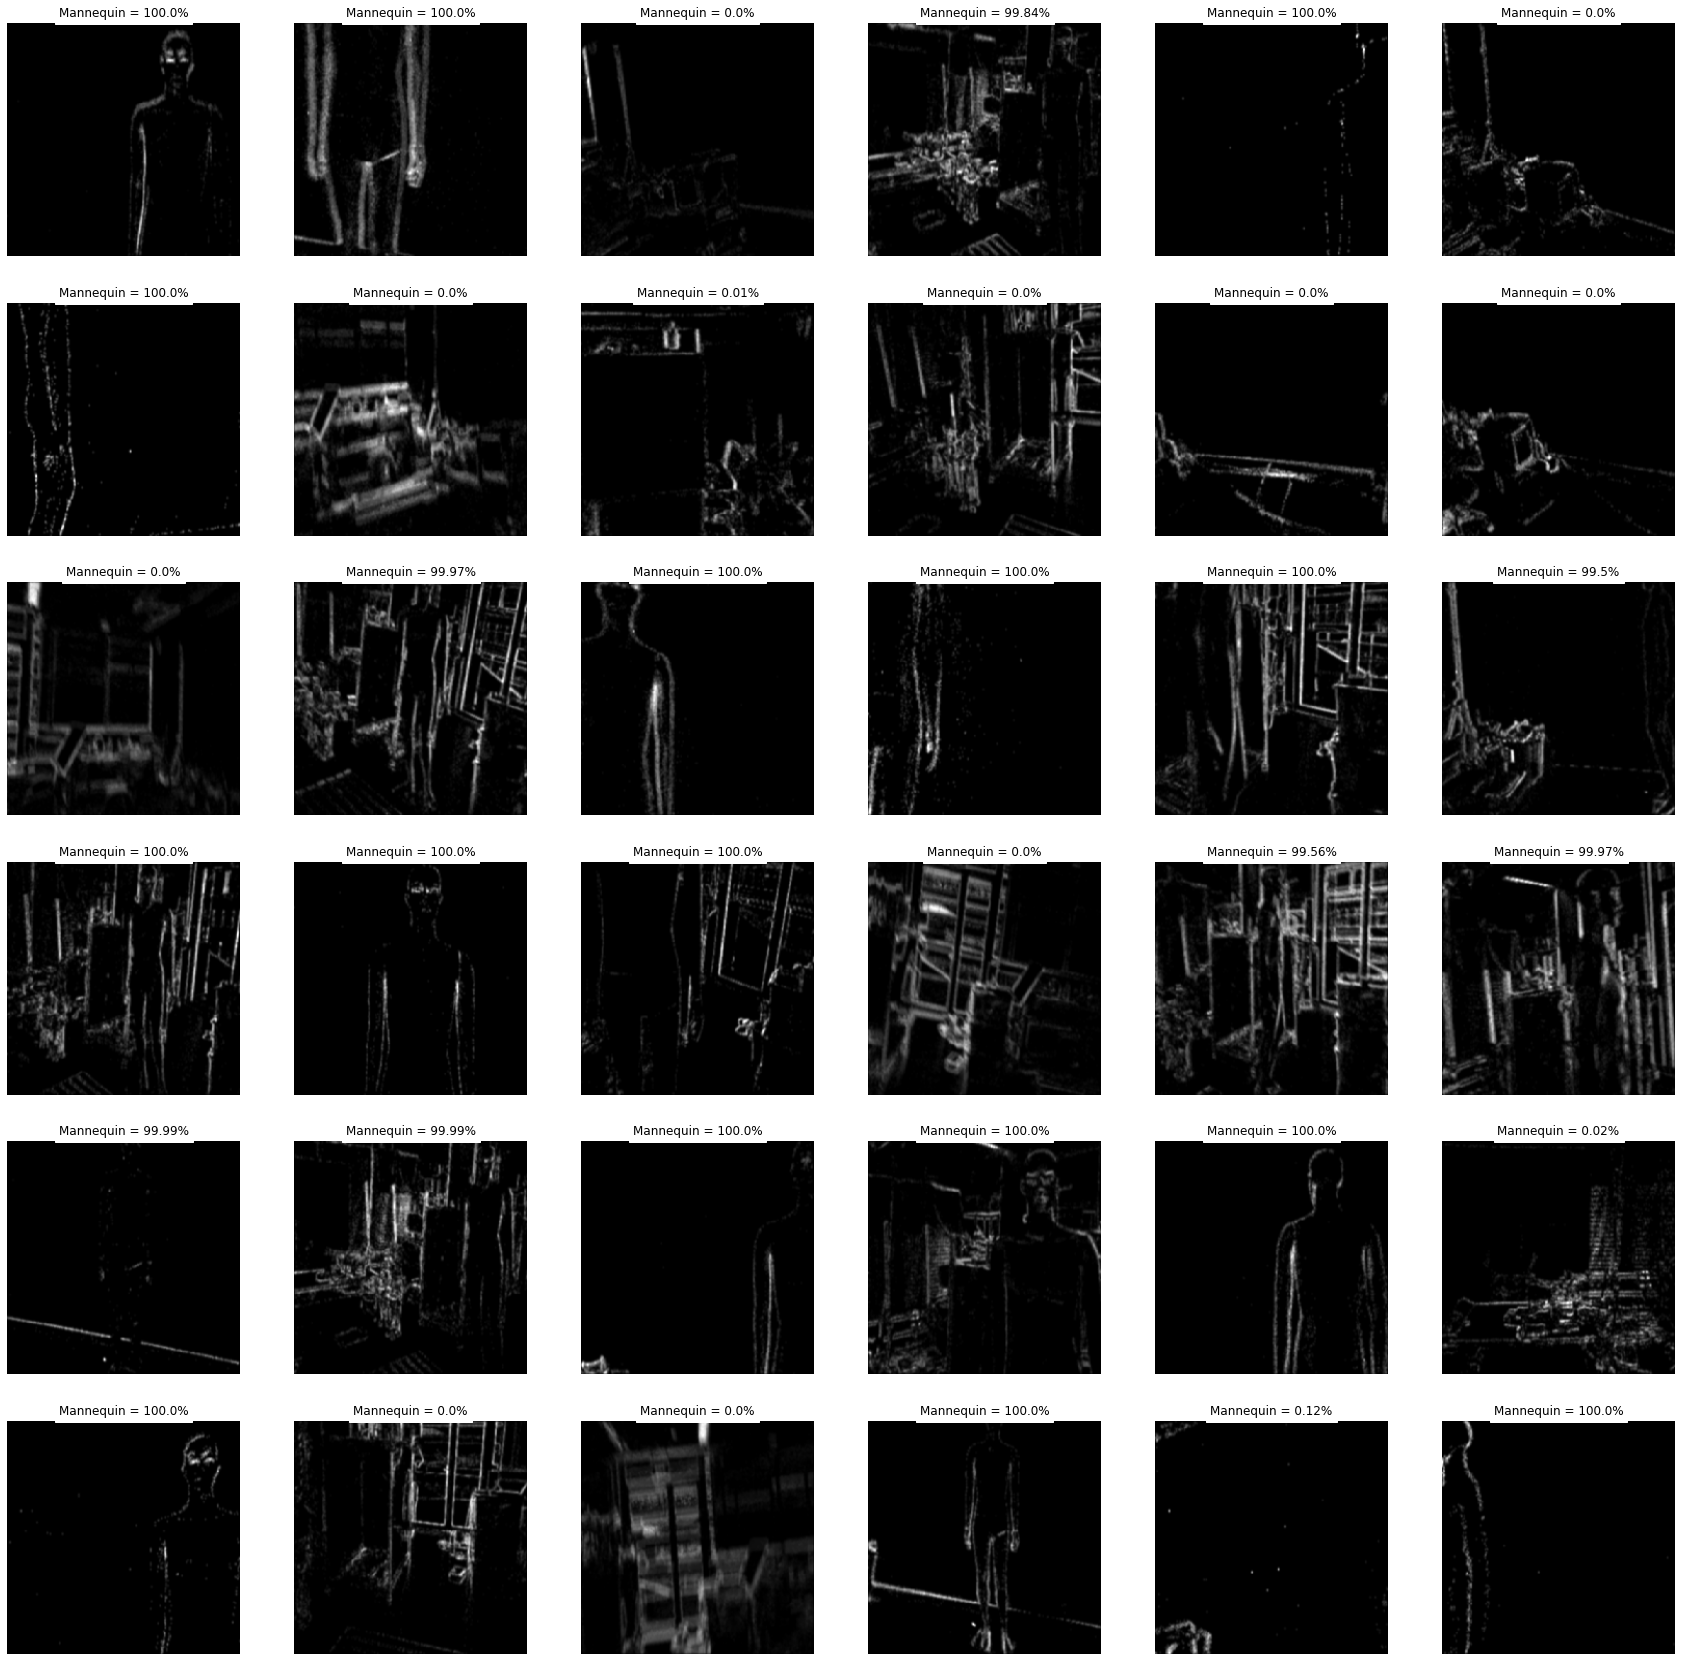

In [24]:
fig,axes = plt.subplots(6,6,sharex=True,figsize=(30,30))

for i,ax in enumerate(axes.ravel()):
    img = img_array[i]
    label = 'Mannequin = ' + str(np.round(predicted_label[i][0]*100,2)) + '%'
    # img = load_img(img,target_size=(150,150),interpolation='bicubic')
    ax.imshow(img)
    ax.set_title(label,backgroundcolor='white')
    ax.axis('Off')


In [9]:
true_label == np.round(predicted_label)

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ Tr

In [10]:
accuracy_score(true_label,np.round(predicted_label))

0.9897435897435898

In [11]:

# def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

#     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title, fontsize=25)
#     #plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
#     plt.yticks(tick_marks, classes, fontsize=15)

#     fmt = '.2f'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black", fontsize = 14)

#     plt.ylabel('True label', fontsize=20)
#     plt.xlabel('Predicted label', fontsize=20)

In [12]:
# round_predicited_label = np.round(predicted_label)
# round_predicited_label = round_predicited_label.astype(np.uint8)

# cnf_matrix = confusion_matrix(true_label, round_predicited_label)
